The objective of this hackathon is to create a powerful and accurate predictive model that can estimate the prices of houses in Nigeria. 
By leveraging the provided dataset, you will analyze various factors that impact house prices, 
identify meaningful patterns, and 
build a model that can generate reliable price predictions. 
The ultimate goal is to provide Wazobia Real Estate Limited with an effective tool to make informed pricing decisions and enhance their competitiveness in the market.

# WAZOBIA HOUSE PREDICTION

Introduction.

Import Necessary Libraries and Load Data.

Exploratory Data Analysis.

Correlation.

Data Wrangling.

Feature engineering.

Tuning Xgboost Model

Training and Evaluationg the XGBoost Model.

Calculating Test Predictions and Creating Submission File.

Model Interpretaion.

Thank you.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# DATA COLLECTION

In [2]:
# reading the data 
train=pd.read_csv('Housing_dataset_train.csv')
test=pd.read_csv('Housing_dataset_test.csv')

we have seven columns in the train dataset with 14000 entries and 6000 entries in the test dataset... let's move

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             14000 non-null  int64  
 1   loc            12187 non-null  object 
 2   title          12278 non-null  object 
 3   bedroom        12201 non-null  float64
 4   bathroom       12195 non-null  float64
 5   parking_space  12189 non-null  float64
 6   price          14000 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 765.8+ KB


In [4]:
#the missing values
train.isna().sum()

ID                  0
loc              1813
title            1722
bedroom          1799
bathroom         1805
parking_space    1811
price               0
dtype: int64

In [5]:
train.head()

,ID,loc,title,bedroom,bathroom,parking_space,price
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565
1,2748,Ondo,Apartment,NaN,2.0,4.0,1672416.689
2,9261,Ekiti,NaN,7.0,5.0,NaN,3364799.814
3,2224,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756
4,10300,Kogi,Terrace duplex,NaN,5.0,6.0,2600700.898


In [6]:
#GETTING THE UNIQUE TITLE OF HOUSES IN THE DATA
train['title'].unique()

array(['Semi-detached duplex', 'Apartment', nan, 'Detached duplex',
       'Terrace duplex', 'Mansion', 'Bungalow', 'Penthouse', 'Townhouse',
       'Flat', 'Cottage'], dtype=object)

# EXPLORATORY DATA ANALYSIS

Id

we have 10182 unique Id 

In [7]:
len(train['ID'].unique())

10182

<Axes: xlabel='ID', ylabel='Density'>

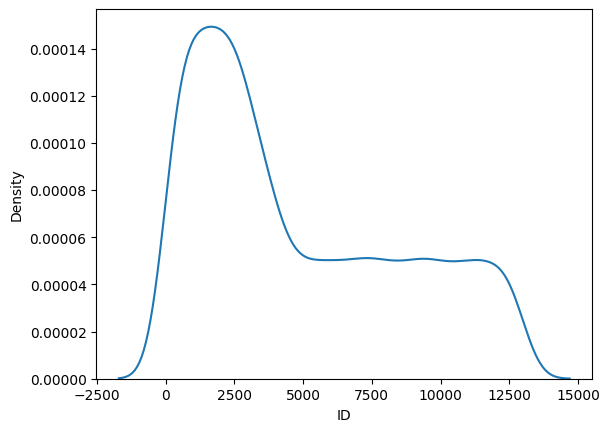

In [8]:
sns.kdeplot(data=train,x='ID')

In [9]:
#CHECKING FOR DUPLICATES
train[train.duplicated(subset=['ID'],keep=False)].sort_values(by='ID',ascending=True)

,ID,loc,title,bedroom,bathroom,parking_space,price
12637,0,Kaduna,Townhouse,7.0,4.0,3.0,2.468008e+06
8591,0,Benue,Penthouse,5.0,2.0,1.0,2.404654e+06
8688,0,Borno,Apartment,4.0,1.0,NaN,1.087381e+06
9553,1,NaN,Penthouse,5.0,1.0,4.0,1.634589e+06
54,1,Niger,Semi-detached duplex,4.0,2.0,2.0,1.476299e+06
...,...,...,...,...,...,...,...
2006,3997,Abia,Penthouse,4.0,1.0,4.0,1.859562e+06
3164,3998,Enugu,NaN,6.0,1.0,5.0,2.799397e+06
11720,3998,Kogi,Apartment,2.0,NaN,4.0,9.257984e+05
1403,3999,Ogun,Semi-detached duplex,4.0,NaN,5.0,2.191322e+06


LOCATION COLUMN

In [10]:
train['loc'].unique()

array(['Katsina', 'Ondo', 'Ekiti', 'Anambra', 'Kogi', 'Borno', 'Kwara',
       'Osun', 'Kaduna', 'Ogun', 'Bayelsa', nan, 'Abia', 'Rivers',
       'Taraba', 'Ebonyi', 'Kebbi', 'Enugu', 'Edo', 'Nasarawa', 'Delta',
       'Kano', 'Yobe', 'Benue', 'Bauchi', 'Cross River', 'Niger',
       'Adamawa', 'Plateau', 'Imo', 'Oyo', 'Zamfara', 'Sokoto', 'Jigawa',
       'Gombe', 'Akwa Ibom', 'Lagos'], dtype=object)

In [11]:
# THE SPREAD OF DATA
train['loc'].value_counts()

loc
Kaduna         370
Anambra        363
Benue          355
Yobe           353
Borno          351
Kano           351
Nasarawa       349
Cross River    349
Zamfara        348
Imo            348
Ebonyi         346
Kebbi          346
Katsina        345
Ogun           345
Ondo           344
Gombe          343
Bauchi         342
Oyo            341
Adamawa        341
Bayelsa        340
Plateau        338
Osun           338
Jigawa         337
Ekiti          336
Kwara          333
Niger          330
Akwa Ibom      329
Lagos          328
Sokoto         326
Delta          325
Enugu          324
Rivers         323
Kogi           321
Taraba         315
Abia           312
Edo            302
Name: count, dtype: int64

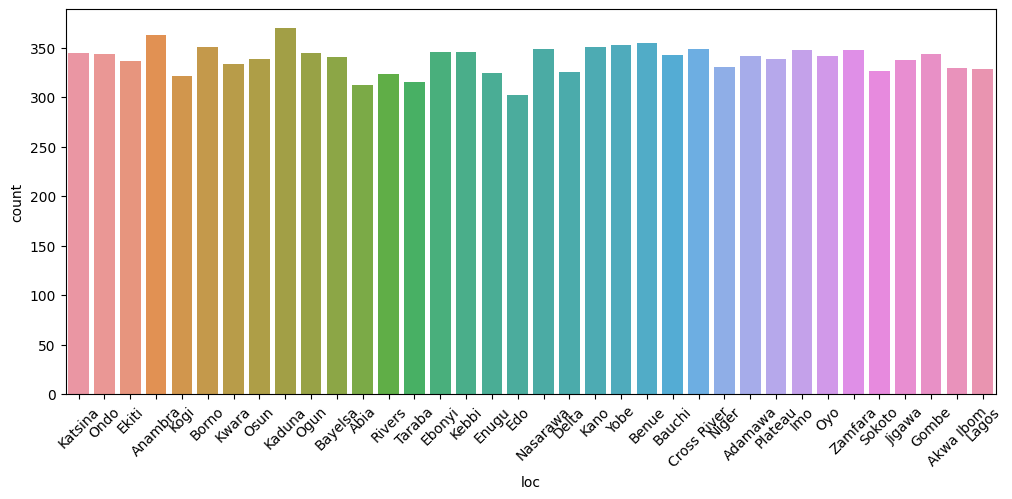

In [12]:
#THE DATA DISTRIBUTED EQUALLY ACCROSS EACH LOCATION
fig,ax=plt.subplots(figsize=(12,5))
sns.countplot(data=train,x='loc')
ax.tick_params(axis='x',labelrotation = 45)

<Figure size 1200x500 with 0 Axes>

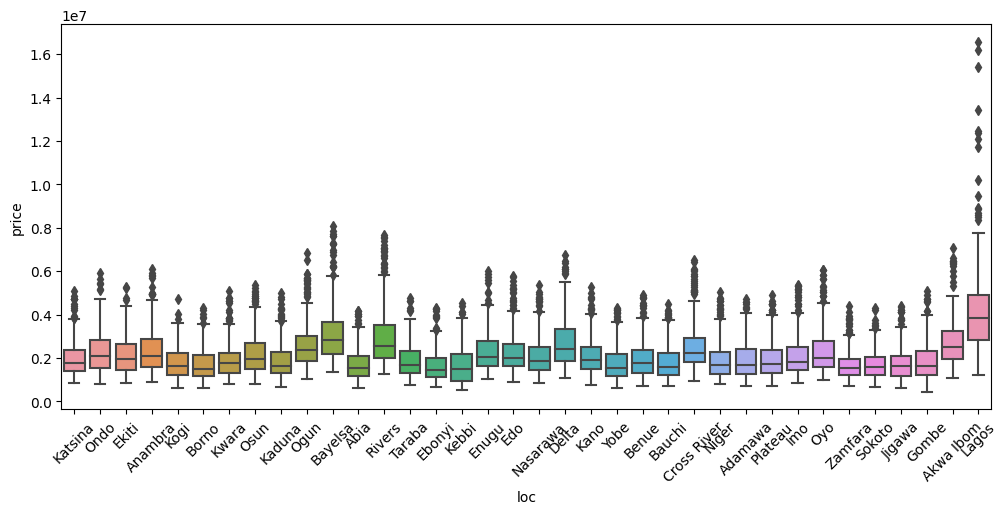

In [13]:
#THE PRICE OF LAGOS SEEMS TO BE HIGHER
plt.figure(figsize=(12,5))

fig,ax=plt.subplots(figsize=(12,5))
sns.boxplot(data=train,x='loc',y='price')
ax.tick_params(axis='x',labelrotation=45)


In [14]:
train.columns

Index(['ID', 'loc', 'title', 'bedroom', 'bathroom', 'parking_space', 'price'], dtype='object')

<Figure size 1200x500 with 0 Axes>

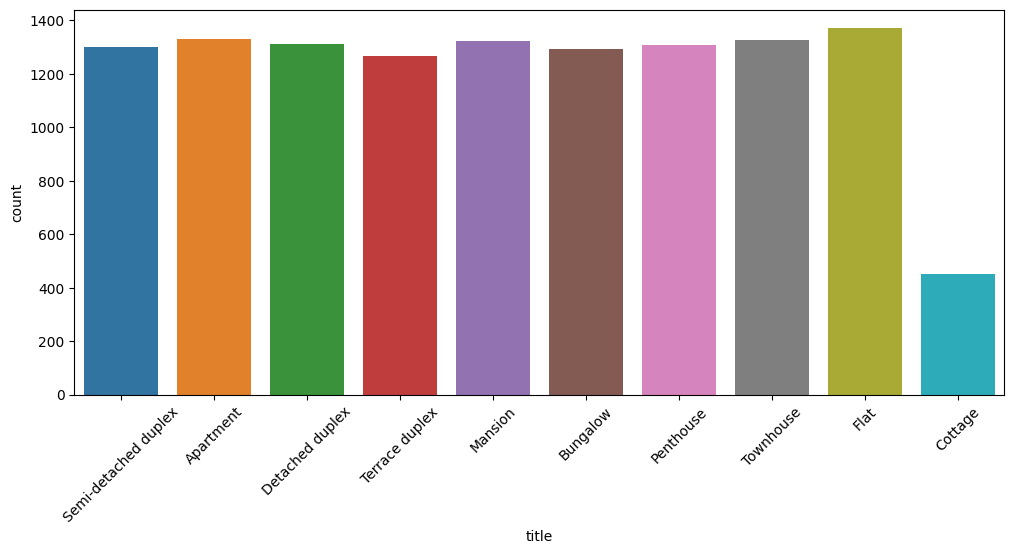

In [15]:
#THE DATA IS DISTRIBUTE ACCROSS DIFFERENT HOUSE TITLES EXCEPT COTTAGE
plt.figure(figsize=(12,5))
fig,ax=plt.subplots(figsize=(12,5))
sns.countplot(data=train,x='title')
ax.tick_params(axis='x',labelrotation = 45)

<Figure size 1200x500 with 0 Axes>

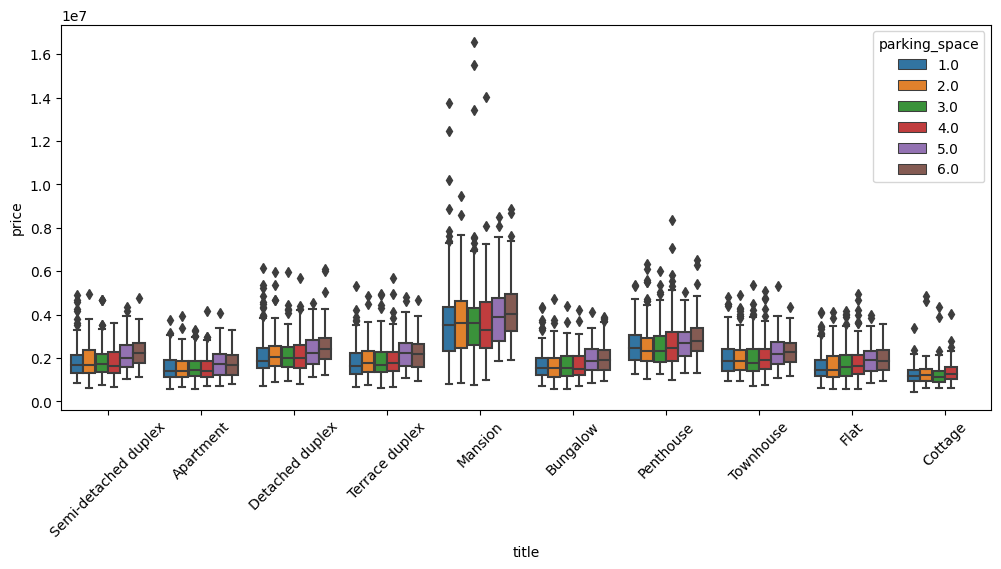

In [16]:

plt.figure(figsize=(12,5))
fig,ax=plt.subplots(figsize=(12,5))
sns.boxplot(data=train,x='title',y='price',hue='parking_space')
ax.tick_params(axis='x',labelrotation = 45)


# BEDROOM 

In [17]:
train.columns

Index(['ID', 'loc', 'title', 'bedroom', 'bathroom', 'parking_space', 'price'], dtype='object')

In [18]:
train['bedroom'].value_counts()

bedroom
5.0    1789
2.0    1741
1.0    1738
3.0    1736
4.0    1641
6.0     908
7.0     888
9.0     883
8.0     877
Name: count, dtype: int64

<Axes: xlabel='bedroom', ylabel='count'>

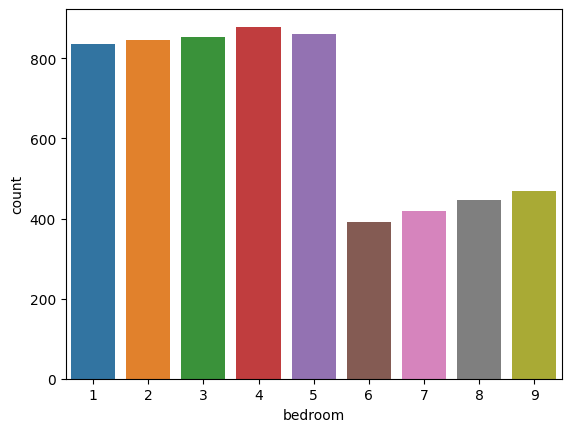

In [19]:
sns.countplot(data=test,x='bedroom')

<Axes: xlabel='bedroom', ylabel='count'>

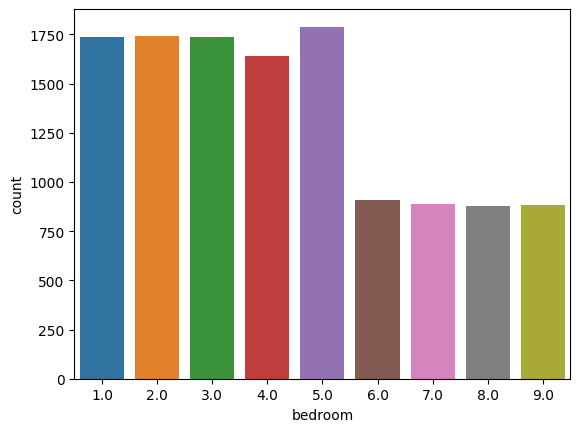

In [20]:
sns.countplot(data=train,x='bedroom')

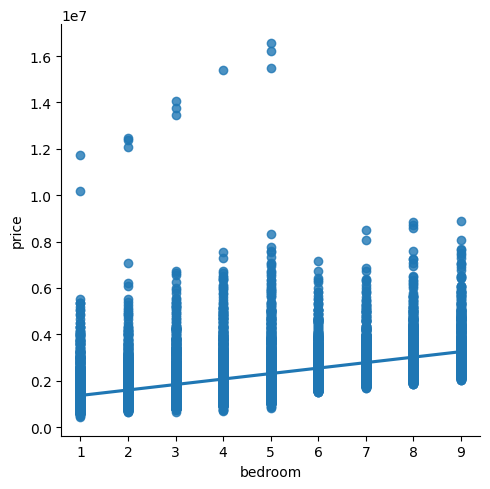

In [21]:
sns.lmplot(data=train,x='bedroom',y='price')
#the prices increased gradually as the number of bedrooms increased which may also be affected by other variables

# BATHROOMS

In [22]:
train.columns

Index(['ID', 'loc', 'title', 'bedroom', 'bathroom', 'parking_space', 'price'], dtype='object')

In [23]:
train['bathroom'].value_counts()

bathroom
1.0    3272
2.0    3255
7.0    1156
5.0    1143
6.0    1138
3.0    1119
4.0    1112
Name: count, dtype: int64

<Axes: xlabel='bathroom', ylabel='count'>

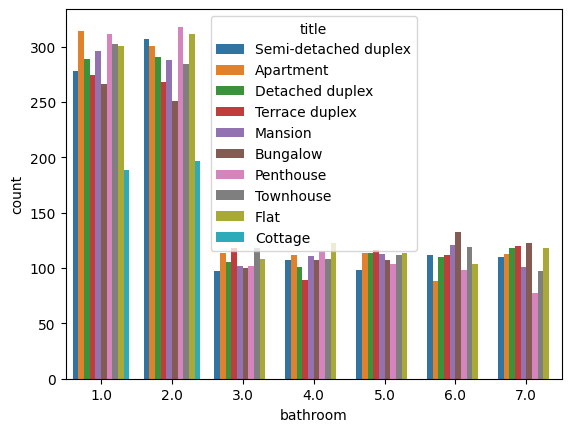

In [24]:
sns.countplot(data=train,x='bathroom',hue='title')

<Axes: xlabel='bathroom', ylabel='Density'>

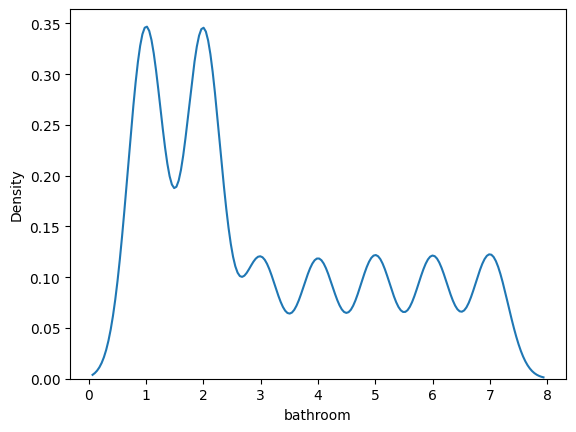

In [25]:
sns.kdeplot(train['bathroom'])

<Axes: xlabel='bathroom', ylabel='price'>

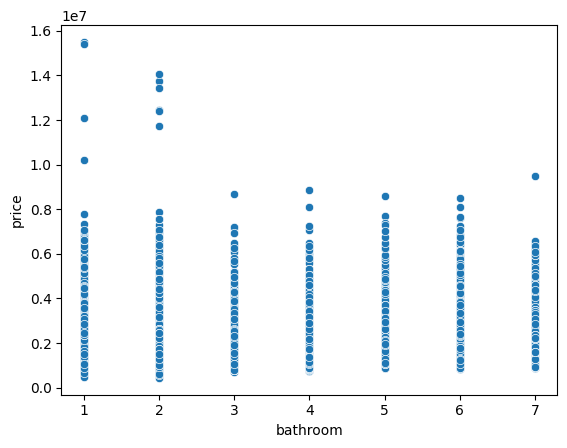

In [26]:
sns.scatterplot(data=train,x='bathroom',y='price')

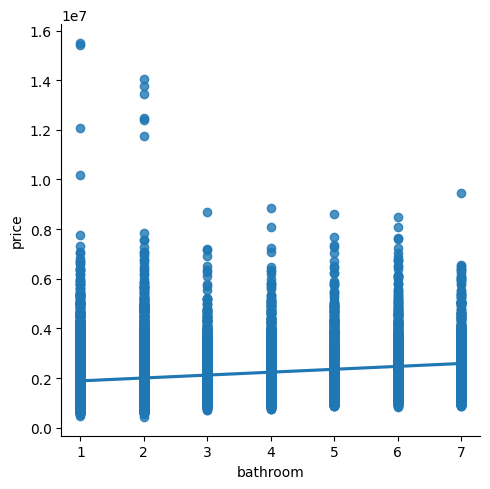

In [27]:
sns.lmplot(data=train,x='bathroom',y='price')
#there is a bit of change although not too significant in the change in price wrt numbers of batthroom

# parking_space

In [28]:
train.columns

Index(['ID', 'loc', 'title', 'bedroom', 'bathroom', 'parking_space', 'price'], dtype='object')

In [29]:
train['parking_space'].value_counts()

parking_space
4.0    2419
2.0    2394
3.0    2378
1.0    2324
6.0    1345
5.0    1329
Name: count, dtype: int64

<Axes: xlabel='parking_space', ylabel='count'>

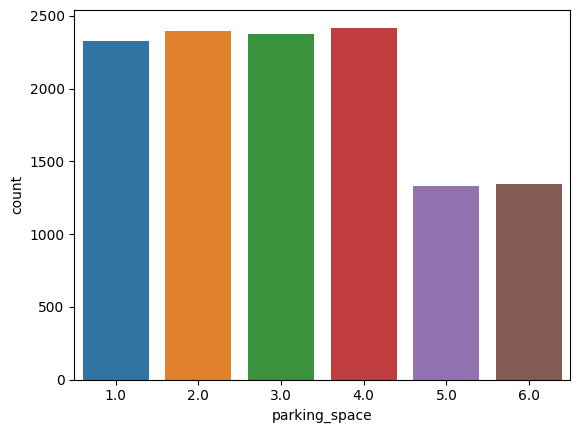

In [30]:
sns.countplot(data=train,x='parking_space',)

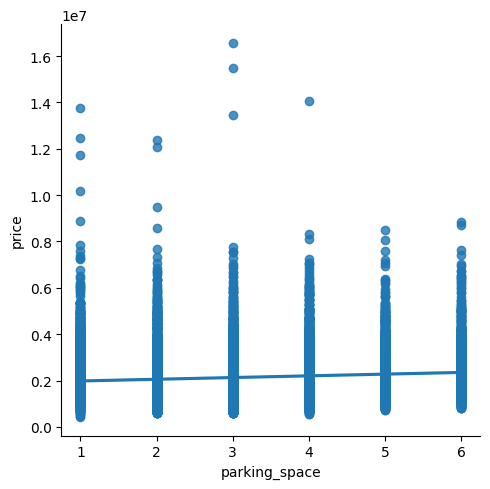

In [31]:
sns.lmplot(data=train,x='parking_space',y='price')

In [32]:
train.columns

Index(['ID', 'loc', 'title', 'bedroom', 'bathroom', 'parking_space', 'price'], dtype='object')

# CORRELATION


In [33]:
train['ID'].max()

12999

In [34]:
len(train)

14000

In [35]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             14000 non-null  int64  
 1   loc            12187 non-null  object 
 2   title          12278 non-null  object 
 3   bedroom        12201 non-null  float64
 4   bathroom       12195 non-null  float64
 5   parking_space  12189 non-null  float64
 6   price          14000 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 765.8+ KB


In [36]:
train.drop(['loc','title'],axis=1).corr()

,ID,bedroom,bathroom,parking_space,price
ID,1.000000,0.230474,0.345121,0.165160,0.167093
bedroom,0.230474,1.000000,0.227417,0.111095,0.529145
bathroom,0.345121,0.227417,1.000000,0.178497,0.221544
parking_space,0.165160,0.111095,0.178497,1.000000,0.109211
price,0.167093,0.529145,0.221544,0.109211,1.000000


<Axes: >

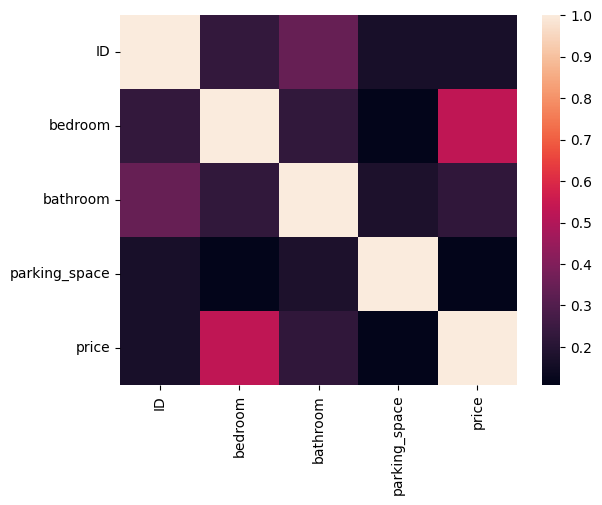

In [37]:
sns.heatmap(train.drop(['loc','title'],axis=1).corr())

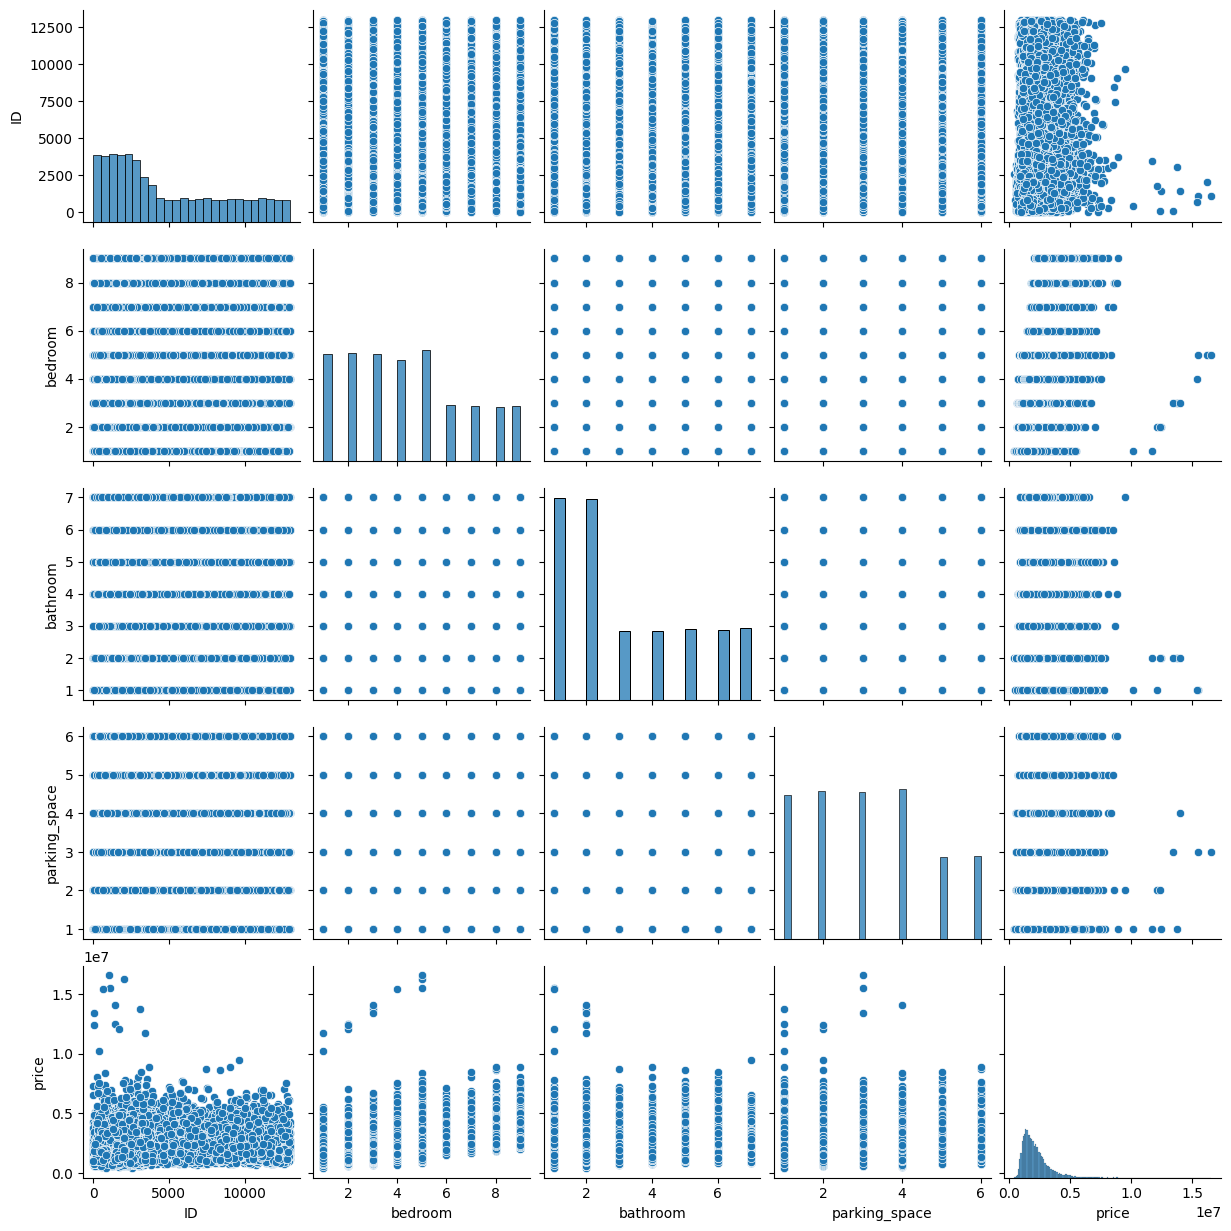

In [38]:
sns.pairplot(train)

# DATA WRANGLING

In [39]:
#missing values
train.isnull().sum()

ID                  0
loc              1813
title            1722
bedroom          1799
bathroom         1805
parking_space    1811
price               0
dtype: int64

In [40]:
#DROPPING MISSING VALUES THAT CUTS ACROSS ALL COLUMNS
train.dropna(how='all',inplace=True)

In [41]:
train.isnull().sum()

ID                  0
loc              1813
title            1722
bedroom          1799
bathroom         1805
parking_space    1811
price               0
dtype: int64

In [42]:
train.dropna(subset=['loc','title'],axis=0,inplace=True)

In [43]:
loc= train.groupby(by=['title','bedroom'])['price'].mean()
#loc_max.loc['Apartment'].loc[1,'price']

In [44]:
train.isnull().sum()

ID                  0
loc                 0
title               0
bedroom          1675
bathroom         1672
parking_space    1671
price               0
dtype: int64

In [45]:
impute = train.groupby(by=['title','loc']).mean()
impute

ID   bedroom  bathroom  parking_space  \
title     loc                                                         
Apartment Abia       5023.633333  4.680000  2.565217       3.615385   
          Adamawa    3840.032258  4.192308  2.862069       3.200000   
          Akwa Ibom  5598.205882  4.269231  2.806452       3.535714   
          Anambra    4392.250000  4.450000  2.450000       3.136364   
          Bauchi     4405.969697  3.370370  3.269231       3.035714   
...                          ...       ...       ...            ...   
Townhouse Rivers     5966.384615  4.200000  2.941176       3.041667   
          Sokoto     4923.521739  4.058824  3.166667       3.250000   
          Taraba     4805.135135  5.666667  3.037037       3.484848   
          Yobe       4355.457143  2.962963  3.064516       2.937500   
          Zamfara    5033.514286  3.333333  3.156250       3.222222   

                            price  
title     loc                      
Apartment Abia       1.307904e+06  
          Adamawa    1.411304e+06  
          Akwa Ibom  1.948163e+06  
          Anambra    1.620074e+06  
          Bauchi     1.148336e+06  
...                           ...  
Townhouse Rivers     2.727497e+06  
          Sokoto     1.686834e+06  
          Taraba     2.161178e+06  
          Yobe       1.513039e+06  
          Zamfara    1.511642e+06  

[360 rows x 5 columns]

In [46]:
round(impute.loc['Apartment'].loc['Abia','bedroom'])

5

In [47]:
#IMPUTING VALUES BASED ON THE LOCATION AND TITLE 
def impute_bed(cols):
    title=cols[0]
    loc=cols[1]
    bed = cols[2]
    if pd.isnull(bed):
        return round(impute.loc[title].loc[loc,'bedroom'])
    else:
        return bed

In [48]:
def impute_bath(cols):
    title=cols[0]
    loc=cols[1]
    bath = cols[2]
    if pd.isnull(bath):
        return round(impute.loc[title].loc[loc,'bathroom'])
    else:
        return bath

In [49]:
def impute_park(cols):
    title=cols[0]
    loc=cols[1]
    park = cols[2]
    if pd.isnull(park):
        return round(impute.loc[title].loc[loc,'parking_space'])
    else:
        return park

In [50]:
#impute missing value
train['bedroom'] = train[['title','loc','bedroom']].apply(impute_bed,axis=1)
train['parking_space'] = train[['title','loc','parking_space']].apply(impute_park,axis=1)
train['bathroom'] = train[['title','loc','bathroom']].apply(impute_bath,axis=1)

In [51]:
train.isnull().sum()

ID               0
loc              0
title            0
bedroom          0
bathroom         0
parking_space    0
price            0
dtype: int64

In [52]:
train['loc'].unique()

array(['Katsina', 'Ondo', 'Anambra', 'Kogi', 'Borno', 'Kwara', 'Osun',
       'Kaduna', 'Ogun', 'Bayelsa', 'Abia', 'Rivers', 'Taraba', 'Ebonyi',
       'Kebbi', 'Enugu', 'Edo', 'Nasarawa', 'Kano', 'Delta', 'Yobe',
       'Benue', 'Bauchi', 'Cross River', 'Niger', 'Adamawa', 'Plateau',
       'Imo', 'Oyo', 'Zamfara', 'Sokoto', 'Jigawa', 'Gombe', 'Lagos',
       'Akwa Ibom', 'Ekiti'], dtype=object)

In [53]:
'''train['dev_enc'] = train['development'].map({'Developed':1,'Underdeveloped':0})
test['dev_enc'] = test['development'].map({'Developed':1,'Underdeveloped':0})'''

"train['dev_enc'] = train['development'].map({'Developed':1,'Underdeveloped':0})\ntest['dev_enc'] = test['development'].map({'Developed':1,'Underdeveloped':0})"

# FEATURE ENGINEERING

In [54]:
#CREATING A FUNCTION TO CLASSIFIY STATES BASED ON THEIR DEVELOPMENT
develop = {'Lagos':'Developed','Kano':'Developed', 'Cross River':'Developed','Anambra':'Developed','Akwa Ibom':'Developed','Ogun':'Developed','Oyo':'Developed','Enugu':'Developed'}
def develop_cat (state):
    if state in develop.keys():
        return develop[state]
    else:
        return 'Underdeveloped'

In [55]:
train['development'] =train['loc'].apply(develop_cat)
test['development'] = test['loc'].apply(develop_cat)

In [56]:
train.head()

,ID,loc,title,bedroom,bathroom,parking_space,price,development
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565,Underdeveloped
1,2748,Ondo,Apartment,3.0,2.0,4.0,1672416.689,Underdeveloped
3,2224,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756,Developed
4,10300,Kogi,Terrace duplex,5.0,5.0,6.0,2600700.898,Underdeveloped
5,1733,Borno,Mansion,4.0,1.0,3.0,1341750.867,Underdeveloped


In [57]:
#CREATING A FEATURE BASED ON THE AVAILABLILITY OF CERTAIN HOUSE TITLES 
title_freq = train.groupby(by=['loc','title']).count()
def title_count(x):
    loc=x[0]
    title=x[1]
    level_1 = title_freq.loc[loc,'ID']
    
    return level_1[title]

In [58]:
train['title_freq'] = train[['loc','title']].apply(title_count,axis=1)
test['title_freq'] = test[['loc','title']].apply(title_count,axis=1)

In [59]:
#creating a feature based on the ratio of the title compared to the number of house per state
total_freq =train.groupby('loc').count()['title']
total_freq['Abia']
def freq_ratio(x):
    loc = x[0]
    title_freq = x[1]
    return (title_freq/total_freq[loc])


train['available'] = train[['loc','title_freq']].apply(freq_ratio,axis=1)
test['available'] = test[['loc','title_freq']].apply(freq_ratio,axis=1)

In [60]:
train.head()

,ID,loc,title,bedroom,bathroom,parking_space,price,development,title_freq,available
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565,Underdeveloped,30,0.102740
1,2748,Ondo,Apartment,3.0,2.0,4.0,1672416.689,Underdeveloped,32,0.106667
3,2224,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756,Developed,34,0.109677
4,10300,Kogi,Terrace duplex,5.0,5.0,6.0,2600700.898,Underdeveloped,31,0.111111
5,1733,Borno,Mansion,4.0,1.0,3.0,1341750.867,Underdeveloped,31,0.101307


In [61]:
train.drop('title_freq',axis=1,inplace=True)

In [62]:
test.drop('title_freq',axis=1,inplace=True)

In [63]:
def check_mansion(x):
    duplex_list = x.split(" ")
    if 'Mansion' in duplex_list:
        return 'Mansion'
    else:
        return 'not Mansion'




In [64]:
train['is_mansion'] = train['title'].apply(check_mansion)
test['is_mansion'] = test['title'].apply(check_mansion)

In [65]:
train.head()

,ID,loc,title,bedroom,bathroom,parking_space,price,development,available,is_mansion
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565,Underdeveloped,0.102740,not Mansion
1,2748,Ondo,Apartment,3.0,2.0,4.0,1672416.689,Underdeveloped,0.106667,not Mansion
3,2224,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756,Developed,0.109677,not Mansion
4,10300,Kogi,Terrace duplex,5.0,5.0,6.0,2600700.898,Underdeveloped,0.111111,not Mansion
5,1733,Borno,Mansion,4.0,1.0,3.0,1341750.867,Underdeveloped,0.101307,Mansion


In [66]:
train['loc'].unique()

array(['Katsina', 'Ondo', 'Anambra', 'Kogi', 'Borno', 'Kwara', 'Osun',
       'Kaduna', 'Ogun', 'Bayelsa', 'Abia', 'Rivers', 'Taraba', 'Ebonyi',
       'Kebbi', 'Enugu', 'Edo', 'Nasarawa', 'Kano', 'Delta', 'Yobe',
       'Benue', 'Bauchi', 'Cross River', 'Niger', 'Adamawa', 'Plateau',
       'Imo', 'Oyo', 'Zamfara', 'Sokoto', 'Jigawa', 'Gombe', 'Lagos',
       'Akwa Ibom', 'Ekiti'], dtype=object)

In [67]:
#geopolitical zones
def zones(location):
    if location in ['Benue','Kogi','Kwara','Nasarawa','Niger','Plateau','Abuja']:
        return 'North Central'
    elif location in ['Adamawa','Bauchi','Borno','Gombe','Taraba','Yobe']:
        return 'North East'
    elif location in ['Jigawa','Kaduna','Kano','Katsina','Kebbi','Sokoto','Zamfara']:
        return 'North West'
    elif location in ['Abia','Anambra','Ebonyi','Enugu','Imo']:
        return 'South East'
    elif location in ['Akwa Ibom','Bayelsa','Cross River','Delta','Edo','Rivers']:
        return 'South South'
    elif location in ['Ekiti','Lagos','Ogun','Ondo','Osun','Oyo']:
        return 'South West'
    

In [68]:
train['zone'] = train['loc'].apply(zones)
test['zone']=test['loc'].apply(zones)

In [69]:
train.head()

,ID,loc,title,bedroom,bathroom,parking_space,price,development,available,is_mansion,zone
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565,Underdeveloped,0.102740,not Mansion,North West
1,2748,Ondo,Apartment,3.0,2.0,4.0,1672416.689,Underdeveloped,0.106667,not Mansion,South West
3,2224,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756,Developed,0.109677,not Mansion,South East
4,10300,Kogi,Terrace duplex,5.0,5.0,6.0,2600700.898,Underdeveloped,0.111111,not Mansion,North Central
5,1733,Borno,Mansion,4.0,1.0,3.0,1341750.867,Underdeveloped,0.101307,Mansion,North East


In [70]:
'''train.drop('',axis=1,inplace=True)'''

"train.drop('',axis=1,inplace=True)"

In [71]:
#creating a feature based on the revenue generated per state
revenue_dict = {'loc':['Katsina', 'Ondo', 'Anambra', 'Kogi', 'Borno', 'Kwara', 'Osun',
       'Kaduna', 'Ogun', 'Bayelsa', 'Abia', 'Rivers', 'Taraba', 'Ebonyi',
       'Kebbi', 'Enugu', 'Edo', 'Nasarawa', 'Kano', 'Delta', 'Yobe',
       'Benue', 'Bauchi', 'Cross River', 'Niger', 'Adamawa', 'Plateau',
       'Imo', 'Oyo', 'Zamfara', 'Sokoto', 'Jigawa', 'Gombe', 'Lagos',
       'Akwa Ibom', 'Ekiti'],'revenue':[3.32,5.10,5.14,3.69,1.96,1.38,2.30,4.31,5.03,4.63,3.53,7.96,2.04,2.24,1.80,1.45,
                                        3.99,1.86,4.20,6.19,1.09,4.27,2.63,4.07,4.58,2.66,1.50,7.68,3.68,1.73,2.85,2.16,2.10,41.17,7.77,2.35]}

In [72]:
revenue = pd.DataFrame(revenue_dict)
revenue['revenue'] = revenue['revenue']*1000000000
revenue.set_index('loc',inplace=True)

In [73]:
train['revenue'] = train['loc'].apply(lambda x: revenue.loc[x])
test['revenue'] = test['loc'].apply(lambda x: revenue.loc[x])

In [74]:
train.head()

,ID,loc,title,bedroom,bathroom,parking_space,price,development,available,is_mansion,zone,revenue
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565,Underdeveloped,0.102740,not Mansion,North West,3.320000e+09
1,2748,Ondo,Apartment,3.0,2.0,4.0,1672416.689,Underdeveloped,0.106667,not Mansion,South West,5.100000e+09
3,2224,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756,Developed,0.109677,not Mansion,South East,5.140000e+09
4,10300,Kogi,Terrace duplex,5.0,5.0,6.0,2600700.898,Underdeveloped,0.111111,not Mansion,North Central,3.690000e+09
5,1733,Borno,Mansion,4.0,1.0,3.0,1341750.867,Underdeveloped,0.101307,Mansion,North East,1.960000e+09


<Axes: xlabel='available', ylabel='Density'>

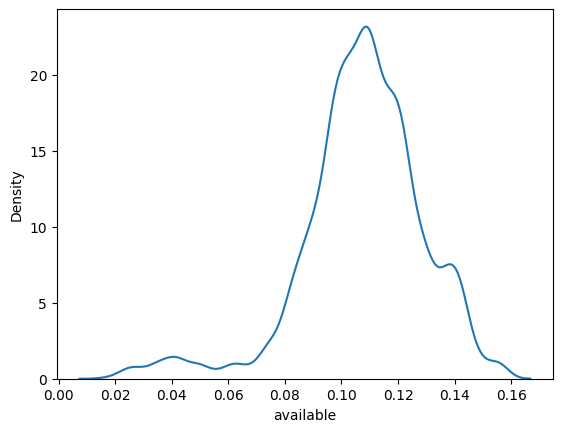

In [75]:
sns.kdeplot(train['available'])

In [76]:
bin_edges = [1000000000,3000000000,6000000000,42000000000]
bin_labels = ['low','middle_income','high_income']
train['revenue_bins'] = pd.cut(train['revenue'],bins=bin_edges,labels=bin_labels)
test['revenue_bins'] = pd.cut(test['revenue'],bins=bin_edges,labels=bin_labels)

In [77]:
revenue_enc ={'low':0,'middle_income':1,'high_income':2} 
train['revenue_bins']= train['revenue_bins'].apply(lambda x: revenue_enc[x])
test['revenue_bins']= test['revenue_bins'].apply(lambda x: revenue_enc[x])

In [78]:
train.drop('revenue',axis=1,inplace=True)
test.drop('revenue',axis=1,inplace=True)

In [79]:
'''from sklearn.preprocessing import LabelEncoder
label_enc = LabelEncoder()
train['loc']=label_enc.fit_transform(train['loc'])'''

"from sklearn.preprocessing import LabelEncoder\nlabel_enc = LabelEncoder()\ntrain['loc']=label_enc.fit_transform(train['loc'])"

In [80]:
train.head()

,ID,loc,title,bedroom,bathroom,parking_space,price,development,available,is_mansion,zone,revenue_bins
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565,Underdeveloped,0.102740,not Mansion,North West,1
1,2748,Ondo,Apartment,3.0,2.0,4.0,1672416.689,Underdeveloped,0.106667,not Mansion,South West,1
3,2224,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756,Developed,0.109677,not Mansion,South East,1
4,10300,Kogi,Terrace duplex,5.0,5.0,6.0,2600700.898,Underdeveloped,0.111111,not Mansion,North Central,1
5,1733,Borno,Mansion,4.0,1.0,3.0,1341750.867,Underdeveloped,0.101307,Mansion,North East,0


In [81]:
test.head()

,ID,loc,title,bedroom,bathroom,parking_space,development,available,is_mansion,zone,revenue_bins
0,845,Kano,Penthouse,4,1,2,Developed,0.129568,not Mansion,North West,1
1,1924,Adamawa,Apartment,2,2,4,Underdeveloped,0.108772,not Mansion,North East,0
2,10718,Adamawa,Bungalow,2,7,2,Underdeveloped,0.101754,not Mansion,North East,0
3,12076,Lagos,Mansion,9,5,2,Developed,0.120438,Mansion,South West,2
4,12254,Gombe,Semi-detached duplex,5,6,1,Underdeveloped,0.114865,not Mansion,North East,0


In [82]:
'''train.drop(['title_freq','revenue'],axis=1,inplace=True)
test.drop(['title_freq','revenue'],axis=1,inplace=True)'''

"train.drop(['title_freq','revenue'],axis=1,inplace=True)\ntest.drop(['title_freq','revenue'],axis=1,inplace=True)"

In [83]:
variables = ['loc','title','zone','development']
train= pd.get_dummies(data=train,prefix=variables,columns=variables,dtype=float,drop_first=True)
test= pd.get_dummies(data=test,prefix=variables,columns=variables,dtype=float,drop_first=True)

In [84]:
variables = ['is_mansion']
train= pd.get_dummies(data=train,prefix=variables,columns=variables,dtype=float,drop_first=True)
test= pd.get_dummies(data=test,prefix=variables,columns=variables,dtype=float,drop_first=True)

In [85]:
corr = train.corr()

In [86]:
len(train.columns)

58

In [87]:
len(test.columns)

57

In [88]:
train.columns

Index(['ID', 'bedroom', 'bathroom', 'parking_space', 'price', 'available',
       'revenue_bins', 'loc_Adamawa', 'loc_Akwa Ibom', 'loc_Anambra',
       'loc_Bauchi', 'loc_Bayelsa', 'loc_Benue', 'loc_Borno',
       'loc_Cross River', 'loc_Delta', 'loc_Ebonyi', 'loc_Edo', 'loc_Ekiti',
       'loc_Enugu', 'loc_Gombe', 'loc_Imo', 'loc_Jigawa', 'loc_Kaduna',
       'loc_Kano', 'loc_Katsina', 'loc_Kebbi', 'loc_Kogi', 'loc_Kwara',
       'loc_Lagos', 'loc_Nasarawa', 'loc_Niger', 'loc_Ogun', 'loc_Ondo',
       'loc_Osun', 'loc_Oyo', 'loc_Plateau', 'loc_Rivers', 'loc_Sokoto',
       'loc_Taraba', 'loc_Yobe', 'loc_Zamfara', 'title_Bungalow',
       'title_Cottage', 'title_Detached duplex', 'title_Flat', 'title_Mansion',
       'title_Penthouse', 'title_Semi-detached duplex', 'title_Terrace duplex',
       'title_Townhouse', 'zone_North East', 'zone_North West',
       'zone_South East', 'zone_South South', 'zone_South West',
       'development_Underdeveloped', 'is_mansion_not Mansion'],
      d

In [89]:
feat = []
for i in train.columns:
    if corr.loc[i,'price']>=0.08:
        feat.append(i)

In [90]:
feat

['ID',
 'bedroom',
 'bathroom',
 'parking_space',
 'price',
 'available',
 'revenue_bins',
 'loc_Akwa Ibom',
 'loc_Bayelsa',
 'loc_Delta',
 'loc_Lagos',
 'loc_Rivers',
 'title_Mansion',
 'title_Penthouse',
 'zone_South South',
 'zone_South West']

In [91]:
selected_feat = ['ID',
 'bedroom',
 'bathroom',
 'parking_space',
 'loc_Akwa Ibom',
 'loc_Bayelsa',
 'loc_Delta',
 'loc_Lagos',
 'loc_Rivers',
 'title_Mansion',
 'title_Penthouse']

In [92]:
'''train.drop('development',axis=1,inplace=True)
test.drop('development',axis=1,inplace=True)'''

"train.drop('development',axis=1,inplace=True)\ntest.drop('development',axis=1,inplace=True)"

In [93]:
'''train.drop(['title_freq','revenue'],axis=1,inplace=True)
test.drop(['title_freq','revenue'],axis=1,inplace=True)
train.head()'''

"train.drop(['title_freq','revenue'],axis=1,inplace=True)\ntest.drop(['title_freq','revenue'],axis=1,inplace=True)\ntrain.head()"

In [94]:
from sklearn.cluster import KMeans
features = test.columns

In [95]:
len(train)

10531

In [96]:
kmeans = KMeans()
kmeans.fit(train[features])
train['clust_type'] = kmeans.predict(train[features])

C:\Users\PC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [97]:
train.corr()

,ID,bedroom,bathroom,parking_space,price,available,revenue_bins,loc_Adamawa,loc_Akwa Ibom,loc_Anambra,...,title_Terrace duplex,title_Townhouse,zone_North East,zone_North West,zone_South East,zone_South South,zone_South West,development_Underdeveloped,is_mansion_not Mansion,clust_type
ID,1.000000,0.210600,0.309937,0.166265,0.173519,0.087978,0.000988,-0.023869,-0.003341,0.002586,...,0.029783,0.013260,-0.017010,0.004778,-0.000123,-0.004204,0.008445,-0.008524,-0.006513,0.326482
bedroom,0.210600,1.000000,0.189606,0.094665,0.495836,0.083652,-0.015264,0.002656,-0.005634,-0.016283,...,0.012198,-0.008812,0.014637,0.001822,-0.037388,0.003909,0.019958,-0.003166,-0.006736,0.029611
bathroom,0.309937,0.189606,1.000000,0.150642,0.204840,0.109924,-0.000408,-0.018385,-0.009997,-0.008439,...,0.031020,0.006741,-0.010780,0.015688,-0.000614,0.006396,-0.007376,-0.006655,-0.011336,0.055376
parking_space,0.166265,0.094665,0.150642,1.000000,0.097368,0.052817,0.006206,-0.015748,-0.006000,0.017193,...,0.000036,0.005816,-0.017229,-0.005971,0.023624,-0.001052,0.006879,-0.012899,0.018442,0.024583
price,0.173519,0.495836,0.204840,0.097368,1.000000,0.103040,0.311020,-0.038424,0.086168,0.038500,...,-0.062935,-0.027020,-0.140137,-0.149048,-0.041729,0.243683,0.190002,-0.241306,-0.512499,0.017692
available,0.087978,0.083652,0.109924,0.052817,0.103040,1.000000,-0.006703,-0.022369,0.027054,-0.006873,...,0.007237,0.056379,0.016410,-0.007383,-0.024434,0.010627,0.026488,-0.017481,-0.036233,0.017300
revenue_bins,0.000988,-0.015264,-0.000408,0.006206,0.311020,-0.006703,1.000000,-0.157182,0.311248,0.084069,...,0.002612,0.002090,-0.422604,-0.160946,0.088440,0.516345,0.106666,-0.343604,-0.014043,-0.002887
loc_Adamawa,-0.023869,0.002656,-0.018385,-0.015748,-0.038424,-0.022369,-0.157182,1.000000,-0.027208,-0.029046,...,-0.001215,-0.005322,0.371937,-0.082741,-0.067521,-0.073021,-0.074327,0.089681,0.000845,-0.008972
loc_Akwa Ibom,-0.003341,-0.005634,-0.009997,-0.006000,0.086168,0.027054,0.311248,-0.027208,1.000000,-0.028411,...,0.005117,-0.004862,-0.073152,-0.080933,-0.066046,0.372602,-0.072703,-0.303385,0.002252,-0.006859
loc_Anambra,0.002586,-0.016283,-0.008439,0.017193,0.038500,-0.006873,0.084069,-0.029046,-0.028411,1.000000,...,-0.002270,-0.000956,-0.078093,-0.086400,0.430170,-0.076250,-0.077613,-0.323876,-0.012519,-0.007373


In [98]:
train.columns

Index(['ID', 'bedroom', 'bathroom', 'parking_space', 'price', 'available',
       'revenue_bins', 'loc_Adamawa', 'loc_Akwa Ibom', 'loc_Anambra',
       'loc_Bauchi', 'loc_Bayelsa', 'loc_Benue', 'loc_Borno',
       'loc_Cross River', 'loc_Delta', 'loc_Ebonyi', 'loc_Edo', 'loc_Ekiti',
       'loc_Enugu', 'loc_Gombe', 'loc_Imo', 'loc_Jigawa', 'loc_Kaduna',
       'loc_Kano', 'loc_Katsina', 'loc_Kebbi', 'loc_Kogi', 'loc_Kwara',
       'loc_Lagos', 'loc_Nasarawa', 'loc_Niger', 'loc_Ogun', 'loc_Ondo',
       'loc_Osun', 'loc_Oyo', 'loc_Plateau', 'loc_Rivers', 'loc_Sokoto',
       'loc_Taraba', 'loc_Yobe', 'loc_Zamfara', 'title_Bungalow',
       'title_Cottage', 'title_Detached duplex', 'title_Flat', 'title_Mansion',
       'title_Penthouse', 'title_Semi-detached duplex', 'title_Terrace duplex',
       'title_Townhouse', 'zone_North East', 'zone_North West',
       'zone_South East', 'zone_South South', 'zone_South West',
       'development_Underdeveloped', 'is_mansion_not Mansion', 'clust_t

In [99]:
train.columns

Index(['ID', 'bedroom', 'bathroom', 'parking_space', 'price', 'available',
       'revenue_bins', 'loc_Adamawa', 'loc_Akwa Ibom', 'loc_Anambra',
       'loc_Bauchi', 'loc_Bayelsa', 'loc_Benue', 'loc_Borno',
       'loc_Cross River', 'loc_Delta', 'loc_Ebonyi', 'loc_Edo', 'loc_Ekiti',
       'loc_Enugu', 'loc_Gombe', 'loc_Imo', 'loc_Jigawa', 'loc_Kaduna',
       'loc_Kano', 'loc_Katsina', 'loc_Kebbi', 'loc_Kogi', 'loc_Kwara',
       'loc_Lagos', 'loc_Nasarawa', 'loc_Niger', 'loc_Ogun', 'loc_Ondo',
       'loc_Osun', 'loc_Oyo', 'loc_Plateau', 'loc_Rivers', 'loc_Sokoto',
       'loc_Taraba', 'loc_Yobe', 'loc_Zamfara', 'title_Bungalow',
       'title_Cottage', 'title_Detached duplex', 'title_Flat', 'title_Mansion',
       'title_Penthouse', 'title_Semi-detached duplex', 'title_Terrace duplex',
       'title_Townhouse', 'zone_North East', 'zone_North West',
       'zone_South East', 'zone_South South', 'zone_South West',
       'development_Underdeveloped', 'is_mansion_not Mansion', 'clust_t

In [100]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10531 entries, 0 to 13998
Data columns (total 59 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   ID                          10531 non-null  int64   
 1   bedroom                     10531 non-null  float64 
 2   bathroom                    10531 non-null  float64 
 3   parking_space               10531 non-null  float64 
 4   price                       10531 non-null  float64 
 5   available                   10531 non-null  float64 
 6   revenue_bins                10531 non-null  category
 7   loc_Adamawa                 10531 non-null  float64 
 8   loc_Akwa Ibom               10531 non-null  float64 
 9   loc_Anambra                 10531 non-null  float64 
 10  loc_Bauchi                  10531 non-null  float64 
 11  loc_Bayelsa                 10531 non-null  float64 
 12  loc_Benue                   10531 non-null  float64 
 13  loc_Borno            

In [101]:
test['clust_type'] = kmeans.predict(test[features])

# TRAINING THE MODEL

In [102]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

In [103]:
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import QuantileTransformer

In [104]:
from sklearn.decomposition import PCA
import xgboost as xgb

In [139]:
x = train.drop(['price'],axis =1 )
y = train['price']

In [140]:
 x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [141]:
x_train

,ID,bedroom,bathroom,parking_space,available,revenue_bins,loc_Adamawa,loc_Akwa Ibom,loc_Anambra,loc_Bauchi,...,title_Terrace duplex,title_Townhouse,zone_North East,zone_North West,zone_South East,zone_South South,zone_South West,development_Underdeveloped,is_mansion_not Mansion,clust_type
2031,2742,4.0,1.0,2.0,0.111111,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,3
3970,2120,5.0,1.0,1.0,0.098305,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,6
6920,8130,2.0,2.0,1.0,0.131387,2,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1
1757,4157,8.0,2.0,4.0,0.121622,0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,3
7760,5868,2.0,2.0,3.0,0.110032,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7592,12207,9.0,7.0,6.0,0.093750,0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,4
6860,12379,1.0,7.0,3.0,0.100000,1,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,4
7124,2644,4.0,1.0,4.0,0.100324,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,3
1139,119,5.0,2.0,3.0,0.049020,0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0


In [142]:
y_train

2031    1911132.787
3970    1227911.179
6920    3268828.975
1757    2823014.054
7760    2395400.259
           ...     
7592    2630644.879
6860    1491278.052
7124    2412892.668
1139    1119482.434
9638    2488282.782
Name: price, Length: 7055, dtype: float64

In [143]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [144]:
lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)

LinearRegression()

In [145]:
regr_trans = TransformedTargetRegressor(regressor=LinearRegression(), transformer=QuantileTransformer(output_distribution='normal'))
regr_trans.fit(x_train,y_train)

TransformedTargetRegressor(regressor=LinearRegression(),
                           transformer=QuantileTransformer(output_distribution='normal'))

In [146]:
#checking the performance metric
y_pred = lin_reg.predict(x_test)
np.sqrt(mean_squared_error(y_test,y_pred))

491235.3965207447

In [147]:
lin_reg.coef_

array([ 1.27071269e+05,  1.75670889e+06,  3.32511184e+05,  1.39104713e+05,
        1.81158105e+05,  3.66511640e+16, -1.56873010e+17, -1.22662611e+17,
       -2.00656898e+17, -1.56873010e+17,  9.63198691e+16,  1.23027590e+16,
       -1.56873010e+17, -1.04337029e+17,  7.79942871e+16,  1.83255820e+16,
        9.63198691e+16,  1.44227043e+17, -1.82331316e+17, -1.56873010e+17,
       -1.83255820e+16, -2.32970793e+16, -4.16226613e+16, -2.42279559e+17,
       -4.16226613e+16, -2.32970793e+16,  1.23027590e+16,  3.06283410e+16,
       -9.30810191e+16,  3.06283410e+16,  1.23027590e+16, -7.47554371e+16,
        1.25901461e+17,  1.44227043e+17, -7.47554371e+16,  3.06283410e+16,
        7.79942871e+16, -2.32970793e+16, -1.56873010e+17, -1.56873010e+17,
       -2.32970793e+16,  1.34112000e+05,  2.63624000e+05,  6.38070000e+05,
        1.33220000e+05, -5.91436473e+16,  1.02400000e+06,  3.12292000e+05,
        2.99136000e+05,  4.73538000e+05,  1.87501351e+17,  5.39254203e+16,
        1.23027590e+16, -

# XGBOOST MODEL

In [148]:
xgb_model =xgb.XGBRegressor(max_depth = 5,min_child_weight=10,gamma = 0.0,colsample_bytree = 0.8,subsample=0.8,colsample_bylevel=0.7,reg_alpha= 0.05,scale_pos_weight = 1,n_estimators= 200,learning_rate=0.1)
xgb_model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=0.7, colsample_bynode=None, colsample_bytree=0.8,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0.0, gpu_id=None,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=10, missing=nan, monotone_constraints=None,
             n_estimators=200, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [149]:
y_pred =xgb_model.predict(x_test)
np.sqrt(mean_squared_error(y_test,y_pred))

421597.20123776444

In [150]:
x_train.columns

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [ ]:
xgb_model.feature_importances_

In [151]:
pd.DataFrame({'feature':x_train.columns,'feature_importance':xgb_model.feature_importances_})

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

# LIGHTGBM MODEL

In [116]:
pip install lightgbm


Note: you may need to restart the kernel to use updated packages.


In [117]:
import lightgbm

In [118]:
lgm_reg = lightgbm.LGBMRegressor(learning_rate=0.1,max_depth= 10,min_child_samples=10,n_estimators=200,num_leaves=20,reg_alpha=0.1,reg_lambda=0.1,subsample=0.1)
lgm_reg.fit(x_train,y_train)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001011 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 611
[LightGBM] [Info] Number of data points in the train set: 7055, number of used features: 58
[LightGBM] [Info] Start training from score 2137006.426112


LGBMRegressor(max_depth=10, min_child_samples=10, n_estimators=200,
              num_leaves=20, reg_alpha=0.1, reg_lambda=0.1, subsample=0.1)

In [119]:
#checking the performance metric
y_pred = lgm_reg.predict(x_test)
np.sqrt(mean_squared_error(y_test,y_pred))

421856.5716160883

# SUBMISSION

In [ ]:
test1 = scaler.transform(test)

In [ ]:
test_subbmission =  lgm_reg.predict(test1)
submission1 = pd.DataFrame({'ID':test['ID'],'':test_subbmission})
submission1.to_csv('First_submission_microsoft33_lgm_417170.csv',index=False)